# NLP Sentiment Analysis Project

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 

The goal in this project is to predict whether customers recommend the product they purchased to the others using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that we need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, we will build sentiment classification models using algorithms ***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***.


---
---


# #Determines

In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.

The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

For the sake of focusing on the NLP the expectation in this project is to using only the "Review Text" variable and neglecting the other ones.

Of course, we are going to use the features other than "Review Text" at the end of the project to retrieve insights from data.

We have structered our project in five sections: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning***.

WE will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, we will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, we will build models with five different algorithms and compare their performance. Thus, we will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.

---
---


# #Task Plan

#### 1. Exploratory Data Analysis<a id='Exploratory Data Analysis'></a>

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Model Comparison

---
---


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import string

from wordcloud import WordCloud

import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("punkt")

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

stop_words = stopwords.words('english')
lem = WordNetLemmatizer()

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ozkanyildirim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ozkanyildirim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ozkanyildirim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
cloth = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=0)

In [3]:
cloth.shape

(23486, 10)

In [4]:
cloth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
cloth.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Data Wrangling
Take info

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

(0.0, 100.0)

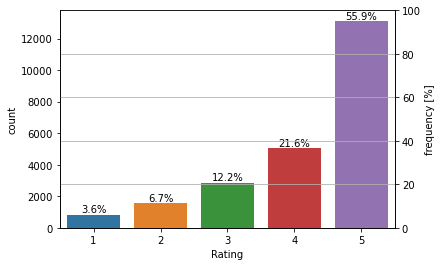

In [6]:
fig = sns.countplot(data=cloth, x='Rating')
fig2 = fig.twinx()

fig.yaxis.set_label_position('left')
fig2.yaxis.set_label_position('right')

fig2.set_ylabel('frequency [%]')

for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:.1f}%'.format(100.*y/len(cloth)), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
fig2.grid(None)
fig2.set_ylim(0,100)

In [7]:
rated = cloth[['Review Text', 'Recommended IND', 'Rating']].rename(columns={'Review Text': 'Review','Recommended IND':'Recommend'})  
rated.head()

,Review,Recommend,Rating
0,Absolutely wonderful - silky and sexy and comf...,1,4
1,Love this dress! it's sooo pretty. i happene...,1,5
2,I had such high hopes for this dress and reall...,0,3
3,"I love, love, love this jumpsuit. it's fun, fl...",1,5
4,This shirt is very flattering to all due to th...,1,5


(0.0, 100.0)

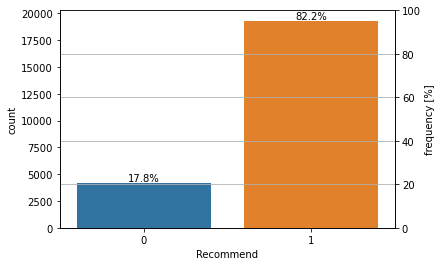

In [8]:
fig = sns.countplot(data=rated, x='Recommend')
fig2 = fig.twinx()

fig.yaxis.set_label_position('left')
fig2.yaxis.set_label_position('right')

fig2.set_ylabel('frequency [%]')

for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:.1f}%'.format(100.*y/len(cloth)), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
fig2.grid(None)
fig2.set_ylim(0,100)

---
---


## 2. Feature Selection and Data Cleaning

From now on, the DataFrame we will work with should contain three columns: **"Review"**, **"Recommended"** and  **"Rating"**. 

### Missing Value Detection

In [9]:
rated.isnull().sum()

Review       845
Recommend      0
Rating         0
dtype: int64

Since our goal is to apply sentiment analysis, we will delete rows without review.

In [10]:
rated = rated[rated.Review.notna()]

In [11]:
rated.head()

,Review,Recommend,Rating
0,Absolutely wonderful - silky and sexy and comf...,1,4
1,Love this dress! it's sooo pretty. i happene...,1,5
2,I had such high hopes for this dress and reall...,0,3
3,"I love, love, love this jumpsuit. it's fun, fl...",1,5
4,This shirt is very flattering to all due to th...,1,5


---
---


## 3. Text Mining

Text is the most unstructured form of all available data, so various types of noise are present in it. This means that the data is not readily analysable without some pre-processing. The entire process of cleaning and standardizing text to make it noise-free and analyzable is called **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


[nltk Library](https://www.guru99.com/nltk-tutorial.html)



### Tokenization & Noise Removal & Lexicon Normalisation

In [12]:
def text_cleaner(datax):
    tokenized = word_tokenize(datax.lower())
    punctuation_free = [txt for txt in tokenized if txt.isalpha()]
    stop_word_free = [txt for txt in punctuation_free if txt not in stop_words]
    cleaned_txt = [lem.lemmatize(txt) for txt in stop_word_free]
    return " ".join(cleaned_txt)

In [13]:
rated.Review = rated.Review.apply(text_cleaner)
rated.head()

,Review,Recommend,Rating
0,absolutely wonderful silky sexy comfortable,1,4
1,love dress sooo pretty happened find store gla...,1,5
2,high hope dress really wanted work initially o...,0,3
3,love love love jumpsuit fun flirty fabulous ev...,1,5
4,shirt flattering due adjustable front tie perf...,1,5


In [14]:
df = rated.copy()

---
---


## 4. WordCloud - Repetition of Words

Now we will create a word cloud for ratings that represents the most frequent words in each target class.

A word cloud is a data visualization technique for representing text data where the size of each word indicates its frequency or importance. Significant text data points can be highlighted with a word cloud.

We are expected to create separate word clouds for positive and negative reviews. We can qualify a review as positive or negative by looking at its recommendation status. We may need to use matplotlib's capabilities for visualizations.

We can follow the steps below:

- Detect reviews
- Collect words 
- Create word cloud 

### Detecting Reviews 

In [15]:
plus = rated[rated.Recommend == 1]
minus = rated[rated.Recommend == 0]
minus.head()

,Review,Recommend,Rating
2,high hope dress really wanted work initially o...,0,3
5,love tracy reese dress one petite foot tall us...,0,2
10,dress run small esp zipper area run ordered sp...,0,3
22,first pullover styling side zipper would purch...,0,2
25,loved material didnt really look long dress pu...,0,3


In [16]:
minus.Rating.value_counts()

3    1653
2    1455
1     806
4     164
5      23
Name: Rating, dtype: int64

In [18]:
minus[minus.Rating>3]

,Review,Recommend,Rating
204,loved top reminded one retailer circa black wh...,0,4
440,loved dress soon tried bunched weird front aro...,0,4
837,ordered two color regular size washed laid fla...,0,4
886,got small petite length perfect love color sup...,0,4
899,ordered usual pilcro petite size impossible bu...,0,4
...,...,...,...
22547,dress beautiful usually wear ordered huge retu...,0,4
23113,planning order online someone returned local s...,0,4
23169,love simple jersey dress try one unfortunately...,0,4
23382,everything dress beautiful except hemline colo...,0,4


In [17]:
plus.Rating.value_counts()

5    12517
4     4744
3     1170
2       94
1       15
Name: Rating, dtype: int64

In [19]:
plus[plus.Rating<3]

,Review,Recommend,Rating
403,got top wear short color go lot different prin...,1,2
503,place want even style sweater great yes sweate...,1,2
551,loved dress saw however fit way lb small way b...,1,2
829,ordered emerald green sent dime size hole slee...,1,2
1027,lb athletic body type ordered size small reall...,1,2
...,...,...,...
22824,tall short waist long leg skirt came way ankle...,1,2
22989,reason title skirt wow felt like could find an...,1,2
23282,reading review decided order usual size thinki...,1,2
23320,love look dress run large ordered extra small ...,1,2


### Collecting Words 

In [21]:
plus_words = ' '.join([txt for txt in plus.Review])
plus_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store glad bc never'

In [22]:
minus_words = ' '.join([txt for txt in minus.Review])
minus_words[:100]

'high hope dress really wanted work initially ordered petite small usual size found outrageously smal'

### Creating Word Cloud

In [23]:
from wordcloud import WordCloud

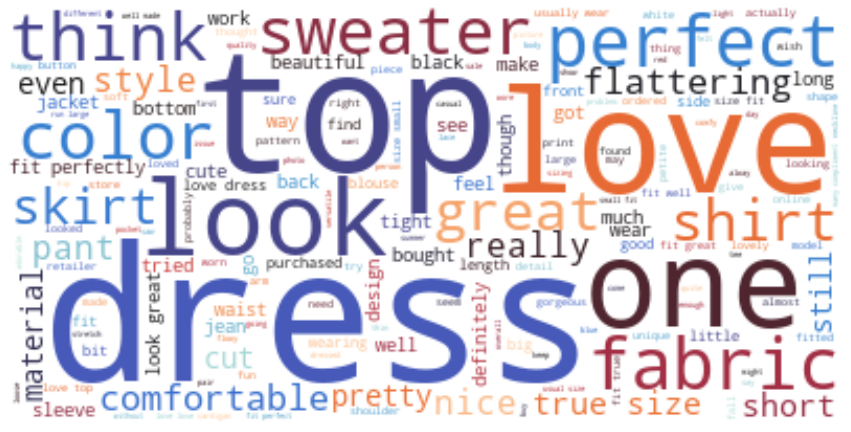

In [28]:
plus_cloud = WordCloud(background_color='white', max_words=len(plus_words), colormap='icefire')
plus_cloud.generate(plus_words)
plt.figure(figsize=(15,15))
plt.imshow(plus_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

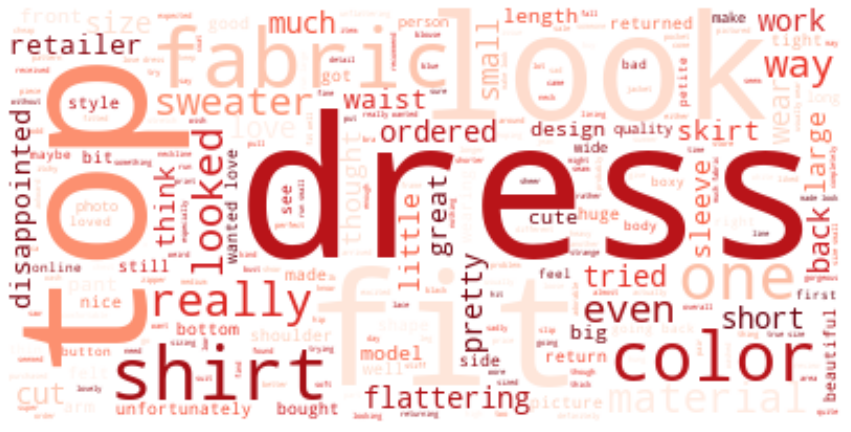

In [29]:
minus_cloud = WordCloud(background_color='white', max_words=len(minus_words), colormap='Reds_r')
minus_cloud.generate(minus_words)
plt.figure(figsize=(15,15))
plt.imshow(minus_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 5. Sentiment Classification with Machine Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In the next step we create a numerical feature vector for each document:

### Vectorization

### TF-IDF

### Logistic Regression

### Naive Bayes 



### Support Vector Machine (SVM)

### Random Forest

### Ada  Boosting

### Compare Models Accuracies and F1 Scores

### Conclusion

This project was aimed to used sentiment analysis to determined product recommendation. We started with the data engineering and text mining, which cover change text into tokens, remove punctuation, numbers, stop words and normalization them by using lemmatization. Following we used bag of words model to convert the text into numerical feature vectors. Finally we started training 5 different Classification models and we got the best accuracy of 0.88 for Logistic Regression method. 

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___